In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import missingno as msno

In [ ]:
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Global YouTube StatisticsATVD2.csv', encoding = 'ISO-8859-1')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Tratamento da base


Nesse contexto, removemos os valores acima de 60.000.000 (Outliers)

In [ ]:
ytb_df = ["rank", "Youtuber", "subscribers", "video views", "uploads", "Country", "channel_type", "created_year"]
df = df.loc[:, ytb_df]

In [ ]:
limite = 60_000_000

df = df.loc[df['subscribers'] <= limite]

In [ ]:
df.dropna(inplace = True)

### Divisão 70%, 30%

In [ ]:
df = df.sample(frac=1)

train_size = int(0.7 * len(df))

train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]

df_reconstruido = pd.concat([train_data, test_data])

print(df.equals(df_reconstruido))


True


In [ ]:
train_data.head()

,rank,Youtuber,subscribers,video views,uploads,Country,channel_type,created_year
307,308,The Chainsmokers,22600000,1.423194e+10,180,United States,Music,2012.0
912,913,Matheus Yurley,12900000,1.400224e+08,69,Brazil,Entertainment,2015.0
909,910,7 Minutoz,13000000,4.349563e+09,521,Brazil,Music,2012.0
378,379,Vijay Television,20400000,2.940621e+10,51515,India,Entertainment,2007.0
381,382,Got Talent Global,20300000,2.441289e+09,1245,United Kingdom,Entertainment,2013.0


### Sample 1, 2, 3

In [ ]:
sample_data1 = train_data.sample(frac= 0.30)
sample_data2 = train_data.sample(frac= 0.30)
sample_data3 = train_data.sample(frac= 0.30)

### Hipóteses estatísticas

### Teste de normalidade entre as duas amostras
Shapiro

Hipótese nula (H0) - Os dados parecem formar uma distribuição normal.

Hipótese alternativa (H0) - Os dados não parecem formar uma distribuição normal.

Nosso nivel de significancia testado será de 5% (0.05), que neste caso tambem é o padrão de alfa.



In [ ]:
from scipy.stats import shapiro

data = sample_data1['subscribers'].dropna()
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente uma Distribuição Normal')
else:
	print('Provavelmente NÃO é uma Distribuição Normal')

stat=0.780, p=0.000
Provavelmente NÃO é uma Distribuição Normal


### Teste de equidade de distribuição das amostras

Kolmogorov-Smirnov

Hipótese nula (H0) - As duas amostras têm a mesma distribuição.

Hipótese alternativa (H1) - As duas amostras NÃO têm a mesma distribuição.

Nosso nivel de significancia testado será de 5% (0.05), que neste caso tambem é o padrão de alfa.

In [ ]:
from scipy import stats
amostra1 = sample_data1['subscribers'].dropna()
amostra2 = sample_data2['subscribers'].dropna()

statistic, p_value = stats.ks_2samp(amostra1, amostra2)

alpha = 0.05

if p_value < alpha:
    print(f"Rejeitamos a hipótese nula: As duas amostras não aparentam ter a mesma distribuição. P  = {p_value}")
else:
    print(f"Não rejeitamos a hipótese nula: As duas amostras aparentam ter a mesma distribuição. P  = {p_value}")


Não rejeitamos a hipótese nula: As duas amostras aparentam ter a mesma distribuição. P  = 0.7245538979728092


### Teste de dependencia
Pearson

Hipótese nula (H0) - As duas amostras são dependentes.

Hipótese alternativa (H1) - As duas amostras não são dependentes.

In [ ]:
correlation1 = sample_data1['subscribers'].corr(sample_data2['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation1)
if correlation1 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 1.0
As amostras são provavelmente dependentes


In [ ]:
correlation2 = sample_data1['subscribers'].corr(sample_data3['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation2)
if correlation2 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 1.0
As amostras são provavelmente dependentes


In [ ]:
correlation3 = sample_data2['subscribers'].corr(sample_data3['subscribers'], method='pearson')

print("Correlação entre sample_data1 e sample_data2:", correlation3)
if correlation3 > 0.956:
    print("As amostras são provavelmente dependentes")

Correlação entre sample_data1 e sample_data2: 1.0
As amostras são provavelmente dependentes


#### Gráfico de densidade

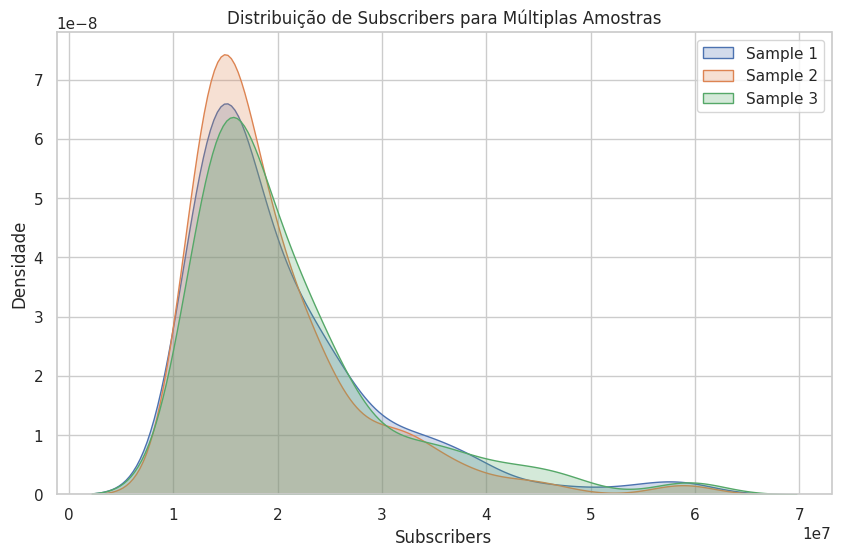

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(data=sample_data1['subscribers'], label='Sample 1', fill=True)
sns.kdeplot(data=sample_data2['subscribers'], label='Sample 2', fill=True)
sns.kdeplot(data=sample_data3['subscribers'], label='Sample 3', fill=True)

plt.title("Distribuição de Subscribers para Múltiplas Amostras")
plt.xlabel("Subscribers")
plt.ylabel("Densidade")
plt.legend()

plt.show()

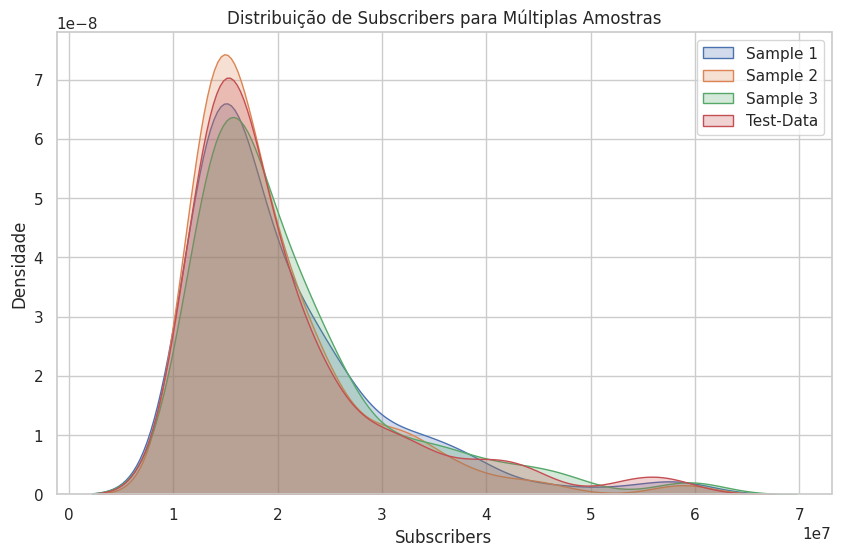

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(data=sample_data1['subscribers'], label='Sample 1', fill=True)
sns.kdeplot(data=sample_data2['subscribers'], label='Sample 2', fill=True)
sns.kdeplot(data=sample_data3['subscribers'], label='Sample 3', fill=True)
sns.kdeplot(data=test_data['subscribers'], label='Test-Data', fill=True)

plt.title("Distribuição de Subscribers para Múltiplas Amostras")
plt.xlabel("Subscribers")
plt.ylabel("Densidade")
plt.legend()

plt.show()

Cada valor numerico da camada de baixo (1e7) representa 10.000.000

#### Desvio

In [ ]:
std_sample1 = np.std(sample_data1['subscribers'])
std_sample2 = np.std(sample_data2['subscribers'])
std_sample3 = np.std(sample_data3['subscribers'])
std_test = np.std(test_data['subscribers'])

print(f"Desvio padrão da Sample 1: {std_sample1:.2f}")
print(f"Desvio padrão da Sample 2: {std_sample2:.2f}")
print(f"Desvio padrão da Sample 3: {std_sample3:.2f}")
print(f"Desvio padrão da Test-data: {std_test:.2f}")

Desvio padrão da Sample 1: 9249166.26
Desvio padrão da Sample 2: 8208634.22
Desvio padrão da Sample 3: 9544542.55
Desvio padrão da Test-data: 9634662.23


In [ ]:
percentage_std_sample1 = abs((std_test - std_sample1)/std_test)*100
percentage_std_sample2 = abs((std_test - std_sample2)/std_test)*100
percentage_std_sample3 = abs((std_test - std_sample3)/std_test)*100

print(f"Desvio padrão da Sample 1 em relação ao test_data: {percentage_std_sample1:.2f}%")
print(f"Desvio padrão da Sample 2 em relação ao test_data: {percentage_std_sample2:.2f}%")
print(f"Desvio padrão da Sample 3 em relação ao test_data: {percentage_std_sample3:.2f}%")

Desvio padrão da Sample 1 em relação ao test_data: 4.00%
Desvio padrão da Sample 2 em relação ao test_data: 14.80%
Desvio padrão da Sample 3 em relação ao test_data: 0.94%


#### O Gráfico Q-Q

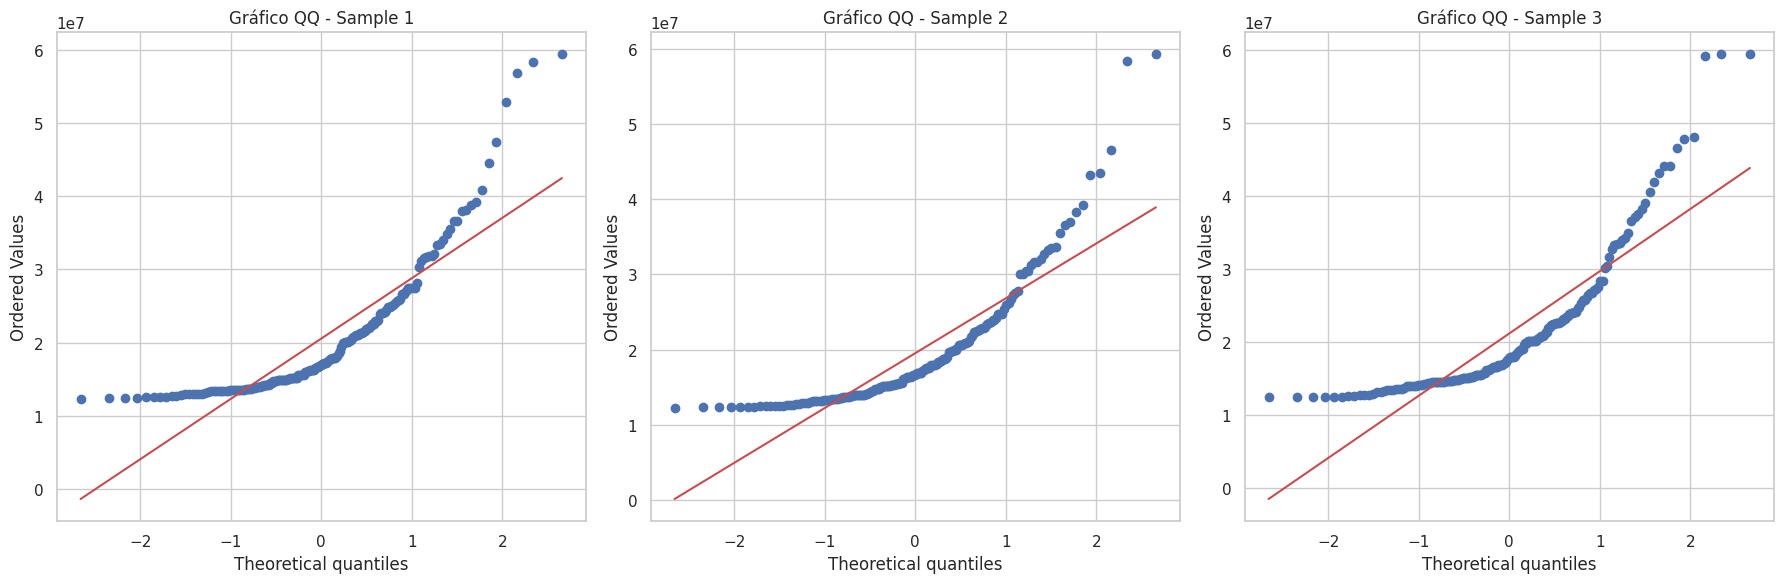

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sample_data in enumerate([sample_data1, sample_data2, sample_data3]):
    stats.probplot(sample_data['subscribers'], dist="norm", plot=axes[i])
    axes[i].set_title(f"Gráfico QQ - Sample {i+1}")

plt.tight_layout()
plt.show()

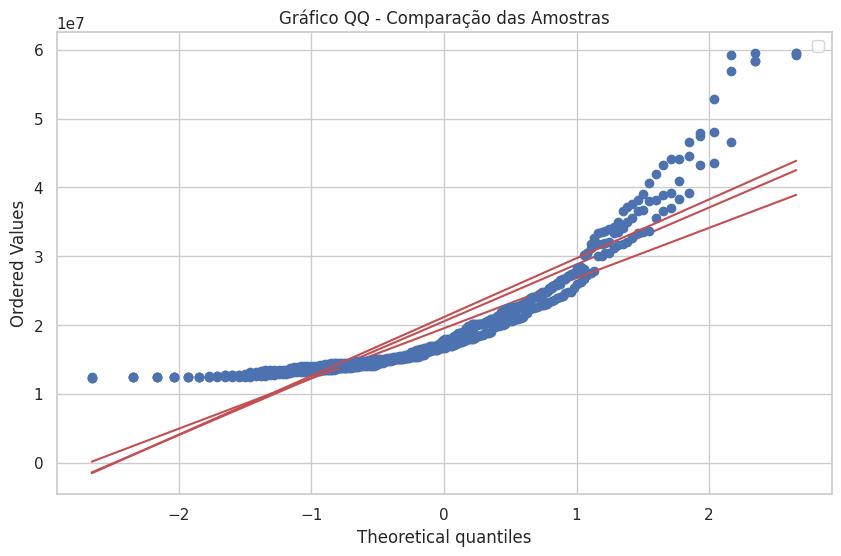

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(sample_data1['subscribers'], dist="norm", plot=plt)

stats.probplot(sample_data2['subscribers'], dist="norm", plot=plt)
stats.probplot(sample_data3['subscribers'], dist="norm", plot=plt)

plt.title("Gráfico QQ - Comparação das Amostras")
plt.legend()
plt.show()

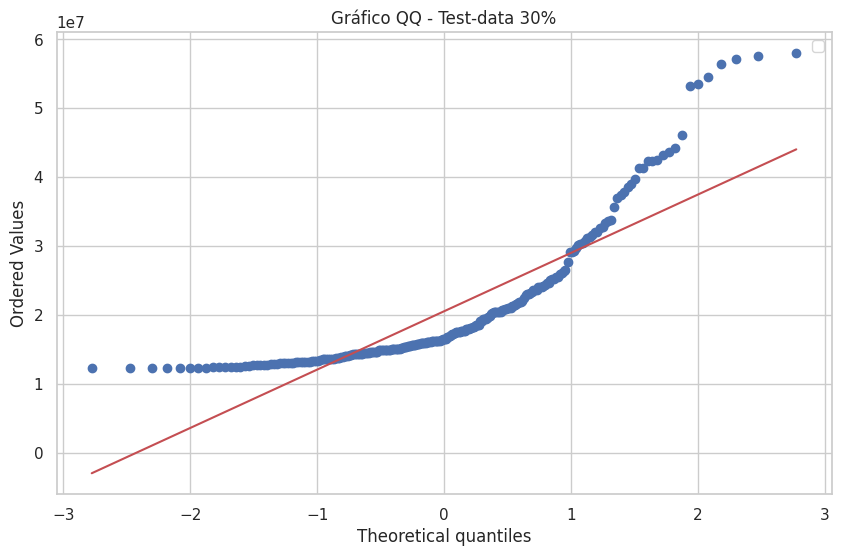

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(test_data['subscribers'], dist="norm", plot=plt)

plt.title("Gráfico QQ - Test-data 30%")
plt.legend()
plt.show()

#### Boxplot

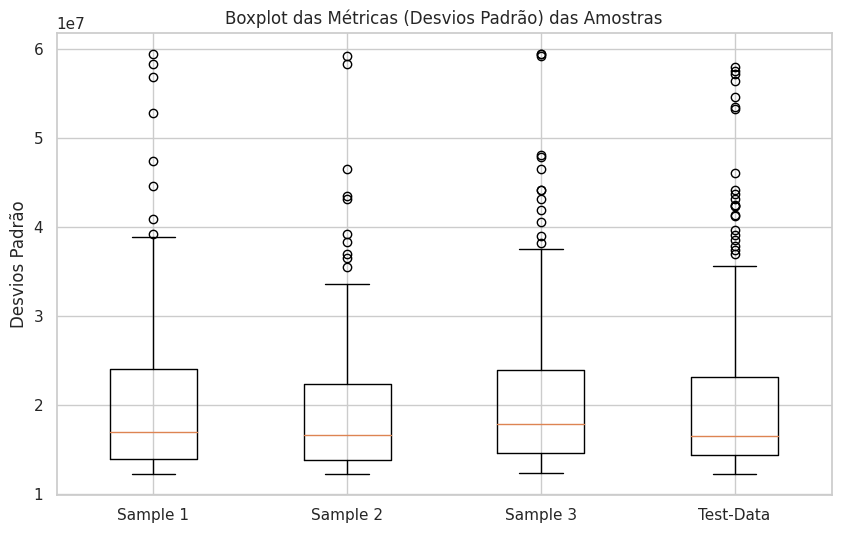

In [ ]:
labels = ['Sample 1', 'Sample 2', 'Sample 3', 'Test-Data']

plt.figure(figsize=(10, 6))
plt.boxplot([sample_data1['subscribers'], sample_data2['subscribers'], sample_data3['subscribers'], test_data['subscribers']], labels=labels)
plt.title("Boxplot das Métricas (Desvios Padrão) das Amostras")
plt.ylabel("Desvios Padrão")
plt.show()

Média

In [ ]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data1['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data1['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 0.08% na média.
Esses valores equivalem a uma diferença direta de 17424.24


In [ ]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data2['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data2['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 5.02% na média.
Esses valores equivalem a uma diferença direta de 1032765.15


In [ ]:
meanDFS = abs(test_data['subscribers'].mean() - sample_data3['subscribers'].mean())
mean_differenceS = abs(test_data['subscribers'].mean() - sample_data3['subscribers'].mean()) / test_data['subscribers'].mean() * 100
print(f"Existe uma diferença de {mean_differenceS:.2f}% na média.")
print(f"Esses valores equivalem a uma diferença direta de {meanDFS :.2f}")

Existe uma diferença de 2.93% na média.
Esses valores equivalem a uma diferença direta de 602462.12


Mediana

In [ ]:
medianDFS = abs(test_data['subscribers'].median() - sample_data1['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data1['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 2.11% na mediana.
Esses valores equivalem a uma diferença direta de 350000.00


In [ ]:
medianDFS = abs(test_data['subscribers'].median() - sample_data2['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data2['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 0.30% na mediana.
Esses valores equivalem a uma diferença direta de 50000.00


In [ ]:
medianDFS = abs(test_data['subscribers'].median() - sample_data3['subscribers'].median())
median_differenceS = abs(test_data['subscribers'].median() - sample_data3['subscribers'].median()) / test_data['subscribers'].median() * 100
print(f"Existe uma diferença de {median_differenceS:.2f}% na mediana.")
print(f"Esses valores equivalem a uma diferença direta de {medianDFS :.2f}")

Existe uma diferença de 7.53% na mediana.
Esses valores equivalem a uma diferença direta de 1250000.00


### Conclusão

Não ouve uma diferença significante nos dados apresentados. Assim, sendo possivel inferir que com base nos graficos e nas metricas representadas, existem evidencias que levam a supor que as amostras tendem a representar de maneira coesa o dataset.